In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# !cp '/content/gdrive/My Drive/Image_Classifier_pump_turbine_PCB/Training.zip' '/tmp/training_zip'
# !cp '/content/gdrive/My Drive/Image_Classifier_pump_turbine_PCB/Validation.zip' '/tmp/validation_zip'
# !cp '/content/gdrive/My Drive/Image_Classifier_pump_turbine_PCB/Testing.zip' '/tmp/testing_zip'

!cp '/content/gdrive/My Drive/mobile_screen_detector/Training.zip' '/tmp/training_zip'
!cp '/content/gdrive/My Drive/mobile_screen_detector/Validation.zip' '/tmp/validation_zip'
!cp '/content/gdrive/My Drive/mobile_screen_detector/Testing.zip' '/tmp/testing_zip'

In [3]:
training_zip='/tmp/training_zip'
validation_zip='/tmp/validation_zip'
testing_zip='/tmp/testing_zip'

In [4]:
import os
import zipfile

zip_ref = zipfile.ZipFile(training_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

zip_ref = zipfile.ZipFile(validation_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

zip_ref = zipfile.ZipFile(testing_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [5]:
# pump_dir = os.path.join('/tmp/Training/pumps')
# turbine_dir = os.path.join('/tmp/Training/Turbines')
# pcb_dir = os.path.join('/tmp/Training/PCB')

# print('total training pump images:', len(os.listdir(pump_dir)))
# print('total training turbine images:', len(os.listdir(turbine_dir)))
# print('total training pcb images:', len(os.listdir(pcb_dir)))

damaged_dir = os.path.join('/tmp/Training/damaged')
undamaged_dir = os.path.join('/tmp/Training/undamaged')

print('total training damaged images:', len(os.listdir(damaged_dir)))
print('total training undamaged images:', len(os.listdir(undamaged_dir)))

total training damaged images: 540
total training undamaged images: 540


In [6]:
train_damaged = os.listdir(damaged_dir)
print(train_damaged[20:30])

train_undamaged = os.listdir(undamaged_dir)
print(train_undamaged[20:30])

['00001500.jpg', '00001301.jpg', '00001133.jpg', '00002053.jpg', '00001422.jpg', '00001604.jpg', '00001592.jpg', '00001519.jpg', '00001484.jpg', '00001490.jpg']
['00000622.jpg', '00000620.jpg', '00000413.jpg', '00000388.jpg', '00000436.jpg', '00000190.jpg', '00000510.jpg', '00000555.jpg', '00000881.jpg', '00000766.jpg']


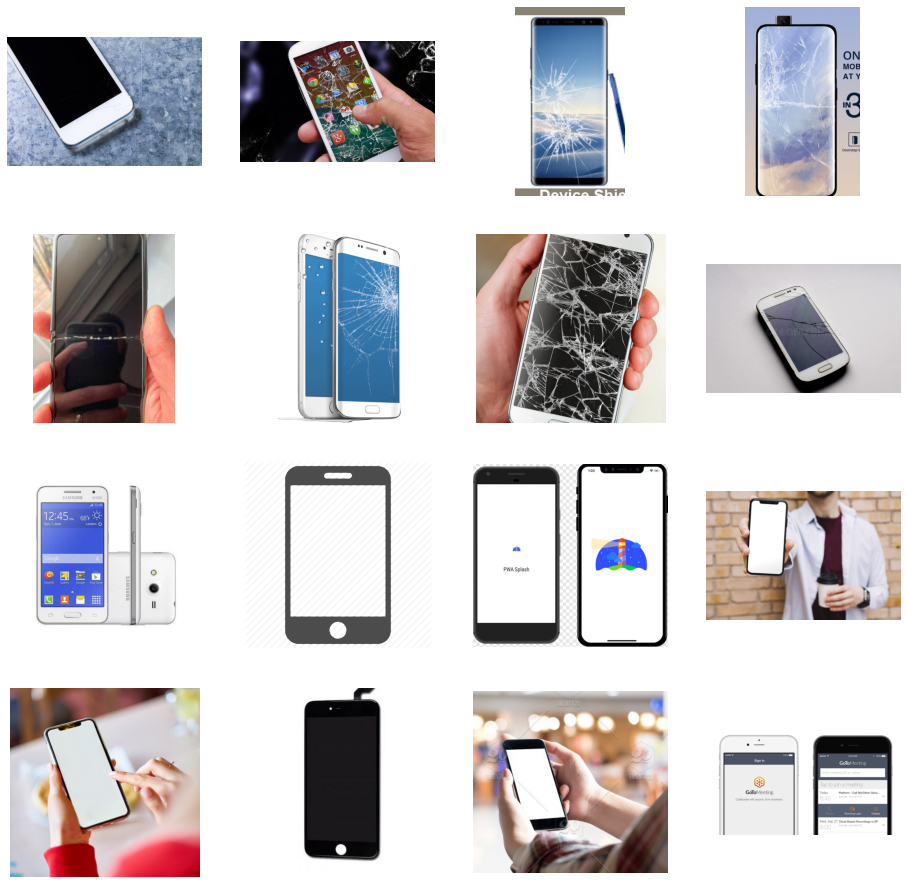

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_damaged_pix = [os.path.join(damaged_dir, fname) 
                for fname in train_damaged[pic_index-8:pic_index]]
next_undamaged_pix = [os.path.join(undamaged_dir, fname) 
                for fname in train_undamaged[pic_index-8:pic_index]]

for i, img_path in enumerate(next_damaged_pix+next_undamaged_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/Training/"
training_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest') 

VALIDATION_DIR = "/tmp/Validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(350,350),
	class_mode='binary',
  batch_size=90
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(350,350),
	class_mode='binary',
  batch_size=20
)


model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(350, 350, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, validation_data = validation_generator, verbose = 2, validation_steps=8)

model.save("binary_classifier.h5")

Found 1080 images belonging to 2 classes.
Found 160 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 84, 84, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 42, 42, 128)       0         
_______________________________________

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


12/12 - 44s - loss: 2.9848 - accuracy: 0.4685 - val_loss: 0.6916 - val_accuracy: 0.5250
Epoch 2/20
12/12 - 46s - loss: 0.6907 - accuracy: 0.5148 - val_loss: 0.6890 - val_accuracy: 0.5125
Epoch 3/20
12/12 - 47s - loss: 0.7033 - accuracy: 0.4917 - val_loss: 0.6911 - val_accuracy: 0.5125
Epoch 4/20
12/12 - 47s - loss: 0.6872 - accuracy: 0.5324 - val_loss: 0.6738 - val_accuracy: 0.5125
Epoch 5/20
12/12 - 47s - loss: 0.6804 - accuracy: 0.5444 - val_loss: 0.6809 - val_accuracy: 0.5000
Epoch 6/20
12/12 - 48s - loss: 0.6677 - accuracy: 0.5861 - val_loss: 0.6613 - val_accuracy: 0.5562
Epoch 7/20
12/12 - 48s - loss: 0.6716 - accuracy: 0.6056 - val_loss: 0.7230 - val_accuracy: 0.5188
Epoch 8/20
12/12 - 48s - loss: 0.6545 - accuracy: 0.6352 - val_loss: 0.6500 - val_accuracy: 0.6938
Epoch 9/20
12/12 - 47s - loss: 0.8087 - accuracy: 0.6806 - val_loss: 0.7388 - val_accuracy: 0.5312
Epoch 10/20
12/12 - 48s - loss: 0.6454 - accuracy: 0.6620 - val_loss: 0.6138 - val_accuracy: 0.6562
Epoch 11/20
12/12 - 

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

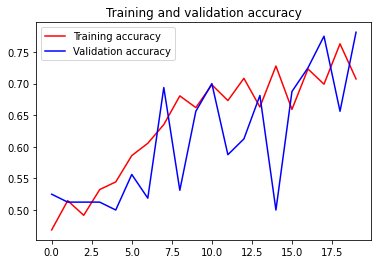

<Figure size 432x288 with 0 Axes>

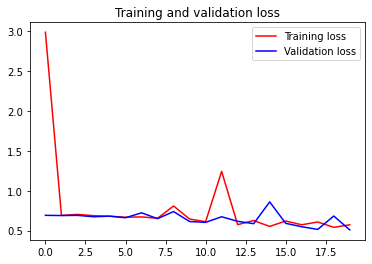

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(350, 350))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 00000155.jpg to 00000155.jpg
Saving 00000165.jpg to 00000165.jpg
Saving 00000225.jpg to 00000225.jpg
Saving 00000228.jpg to 00000228.jpg
Saving 00000262.jpg to 00000262.jpg
00000155.jpg
[[1.]]
00000165.jpg
[[1.]]
00000225.jpg
[[1.]]
00000228.jpg
[[0.]]
00000262.jpg
[[1.]]


In [37]:
import numpy
TESTING_DIR='/tmp/Testing/'

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
	TESTING_DIR,
	target_size=(350,350),
	class_mode='binary',
  batch_size=20,
  shuffle=False
)

test_steps_per_epoch = numpy.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict(test_generator, steps=test_steps_per_epoch)
# Get most likely class
# predicted_classes = numpy.argmax(predictions, axis=1)
predicted_classes=[]
for i in predictions:
  if i > 0.5:
    predicted_classes.append(1)
  else:
    predicted_classes.append(0)

Found 44 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [40]:
print(predicted_classes)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [41]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   

In [26]:
true_classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [42]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix as cm
 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

     damaged       0.96      0.74      0.83        34
   undamaged       0.50      0.90      0.64        10

    accuracy                           0.77        44
   macro avg       0.73      0.82      0.74        44
weighted avg       0.86      0.77      0.79        44



In [50]:
print (cm(true_classes, predicted_classes))

[[25  9]
 [ 1  9]]




```
#Test on PCB's

```



In [ ]:
#97 pcb
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250, 250))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 00000869.jpg to 00000869.jpg
Saving 00000878.jpg to 00000878.jpg
Saving 00000879.jpg to 00000879.jpg
Saving 00000883.jpg to 00000883.jpg
Saving 00000884.jpg to 00000884.jpg
Saving 00001011.jpg to 00001011 (1).jpg
00000869.jpg
[[1.]]
00000878.jpg
[[1.]]
00000879.jpg
[[1.]]
00000883.jpg
[[1.]]
00000884.jpg
[[1.]]
00001011.jpg
[[1.]]


TEST on *Pumps*

In [ ]:
#92
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 00000836.jpg to 00000836 (1).jpg
Saving 00000837.jpg to 00000837 (1).jpg
Saving 00000838.jpg to 00000838 (1).jpg
Saving 00000840.jpg to 00000840 (1).jpg
Saving 00000842.jpg to 00000842 (1).jpg
Saving 00000850.jpg to 00000850 (1).jpg
Saving 00000851.jpg to 00000851 (1).jpg
Saving 00000853.jpg to 00000853 (1).jpg
Saving 00000854.jpg to 00000854 (1).jpg
Saving 00000855.jpg to 00000855 (1).jpg
Saving 00000863.jpg to 00000863 (1).jpg
Saving 00000866.jpg to 00000866 (1).jpg
Saving 00000867.jpg to 00000867 (1).jpg
Saving 00000868.jpg to 00000868 (1).jpg
Saving 00000869.jpg to 00000869 (1).jpg
Saving 00000878.jpg to 00000878 (1).jpg
Saving 00000879.jpg to 00000879 (1).jpg
Saving 00000883.jpg to 00000883 (1).jpg
Saving 00000884.jpg to 00000884 (1).jpg
Saving 00001011.jpg to 00001011 (2).jpg
Saving 00001013.jpg to 00001013 (2).jpg
Saving 00001014.jpg to 00001014 (1).jpg
Saving 00001016.jpg to 00001016 (1).jpg
Saving 00001018.jpg to 00001018 (1).jpg
Saving 00001035.jpg to 00001035 (1).jpg


TEST on Turbines

In [ ]:
#70
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 00000943.jpg to 00000943 (4).jpg
Saving 00000944.jpg to 00000944 (4).jpg
Saving 00000950.jpg to 00000950 (4).jpg
Saving 00000951.jpg to 00000951 (4).jpg
Saving 00000953.jpg to 00000953 (4).jpg
Saving 00000958.jpg to 00000958 (4).jpg
Saving 00000959.jpg to 00000959 (4).jpg
Saving 00000960.jpg to 00000960 (4).jpg
Saving 00000961.jpg to 00000961 (4).jpg
Saving 00000962.jpg to 00000962 (4).jpg
Saving 00000963.jpg to 00000963 (4).jpg
Saving 00000964.jpg to 00000964 (4).jpg
Saving 00000965.jpg to 00000965 (4).jpg
Saving 00000969.jpg to 00000969 (4).jpg
Saving 00000970.jpg to 00000970 (4).jpg
Saving 00000971.jpg to 00000971 (4).jpg
Saving 00000972.jpg to 00000972 (4).jpg
Saving 00000973.jpg to 00000973 (4).jpg
Saving 00000974.jpg to 00000974 (4).jpg
Saving 00000975.jpg to 00000975 (4).jpg
Saving 00000976.jpg to 00000976 (4).jpg
Saving 00000980.jpg to 00000980 (4).jpg
Saving 00000981.jpg to 00000981 (4).jpg
Saving 00000983.jpg to 00000983 (4).jpg
Saving 00000985.jpg to 00000985 (4).jpg
